# Vulnerability Analysis

## Loading in data

In [1]:
from ema_workbench import load_results
from ema_workbench.analysis import parcoords
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

C:\Users\busko\anaconda3\envs\VolOpt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\busko\anaconda3\envs\VolOpt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# path = path = "C:/Users/busko/OneDrive - Delft University of Technology/TU Delft/Engineering Policy Analysis (EPA)/Year 2/Afstuderen/Results cloud services/results1/"
# experiments = pd.read_csv(path + 'experiments.csv')
# outcomes_df=pd.DataFrame()

In [3]:
path = "C:/Users/busko/OneDrive - Delft University of Technology/TU Delft/Engineering Policy Analysis (EPA)/Year 2/Afstuderen/Results cloud services/"

experiments1 = pd.read_csv(path + 'results1/experiments.csv')
experiments2 = pd.read_csv(path + 'results2/experiments.csv')
experiments3 = pd.read_csv(path + 'results3/experiments.csv')
experiments4 = pd.read_csv(path + 'results4/experiments.csv')
experiments5 = pd.read_csv(path + 'results5/experiments.csv')

experiments = pd.concat([experiments1, experiments2, experiments3, experiments4, experiments5], ignore_index=True)

multiple_outcome_dfs = []

for i in range(5):
    print(i)
    outcomes_df = pd.DataFrame()
    irri = np.load(path + f'results{i+1}/j_irri.npy')
    reliability = np.load(path +  f'results{i+1}/j_energy_reliability.npy')
    flood = np.load(path +  f'results{i+1}/j_fldcntrl.npy')
    akosombo = np.load(path +  f'results{i+1}/j_hyd_a.npy')
    kpong = np.load(path +  f'results{i+1}/j_hyd_kp.npy')
    environ = pd.read_csv(path +  f'results{i+1}/j_env.csv', header=None).values
    
    outcomes_df['j_hyd_a'] = akosombo.tolist()
    outcomes_df['j_hyd_kp'] = kpong.tolist()
    outcomes_df['j_energy_reliability'] = reliability.tolist()
    outcomes_df['j_irri'] = irri.tolist()
    outcomes_df['j_env'] = environ.tolist()
    outcomes_df['j_fldcntrl'] = flood.tolist()
    
    multiple_outcome_dfs.append(outcomes_df)
    
combined_outcomes_df = pd.concat([multiple_outcome_dfs[0], multiple_outcome_dfs[1], multiple_outcome_dfs[2], multiple_outcome_dfs[3], multiple_outcome_dfs[4]], ignore_index=True)
outcomes_df = combined_outcomes_df
combined = pd.concat([experiments, outcomes_df], axis=1)

0
1
2
3
4


In [4]:
combined = pd.concat([experiments, outcomes_df], axis=1)
combined[0:1]

Cjanuary  Cfebruary    Cmarch   Capril      Cmay     Cjune    Cjuly  \
0  0.985743   0.003123 -0.200545 -0.17875 -0.009715  0.168004 -0.13973   

    Caugust  Cseptember  Coctober  ...  treatiesTogo  scenario  policy  \
0 -0.024965    0.346693  0.345195  ...       0.96781         0    None   

                 model                                            j_hyd_a  \
0  ReleasePol0Set50x20  [[3208.042209486073, 3641.19457200445, 3838.56...   

                                            j_hyd_kp  \
0  [[620.2568276525824, 707.5613029932666, 747.65...   

                                j_energy_reliability  \
0  [[19455.903496898052, 3573.1446014298326, 2250...   

                                              j_irri  \
0  [[0.053663427941976045, 0.06619550834196296, 0...   

                                               j_env  \
0  [0.5730136986301371, 0.5704109589041095, 0.576...   

                                          j_fldcntrl  
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  

[1 rows x 31 columns]

### Stochastic hydrology aggregation

In [5]:
#Selection of percentage from all years (50x20=1000 outcome values per metric)
returnT = pd.DataFrame(data=np.zeros(1))
returnT['j_env'] = 1/30 # low is bad
returnT['j_hyd_a'] = 1/20 # low is bad
returnT['j_hyd_kp'] = 1/20 # low is bad
returnT['j_irri'] = 1/30 # low is bad
returnT['j_fldcntrl'] = 1-1/100 #  high is bad
returnT['j_energy_reliability'] = 1-1/10 #High is bad

combined_returnT = combined.copy()
for key in outcomes_df.columns:
    combined_returnT[key] = combined[key].apply(lambda x : np.percentile(x, returnT[key][0]*100))

In [6]:
combined_returnT

Cjanuary  Cfebruary    Cmarch    Capril      Cmay     Cjune     Cjuly  \
0      0.985743   0.003123 -0.200545 -0.178750 -0.009715  0.168004 -0.139730   
1      0.953190  -0.040667 -0.035676 -0.150909  0.139534  0.444374 -0.106509   
2      0.518526  -0.239087 -0.067734  0.015299  0.000377  0.536831 -0.130760   
3      0.563093  -0.219798 -0.142214 -0.031872  0.024686  0.544057 -0.148432   
4      0.806969  -0.181960 -0.065449 -0.130500 -0.005875  0.113574 -0.122951   
...         ...        ...       ...       ...       ...       ...       ...   
21595  0.429194  -0.026662  0.028634 -0.021078 -0.055199  0.455868 -0.137495   
21596  0.507912  -0.196188 -0.184409  0.018254 -0.035801  0.388640 -0.109745   
21597  0.695285  -0.089233 -0.133375 -0.028964  0.033399  0.398786 -0.119906   
21598  0.584620  -0.006900 -0.170951 -0.118589 -0.034674  0.512193 -0.132515   
21599  0.405145  -0.162596  0.004840  0.022429 -0.007152  0.366050 -0.132396   

        Caugust  Cseptember  Coctober  ...  treatiesTogo  scenario  policy  \
0     -0.024965    0.346693  0.345195  ...      0.967810         0    None   
1     -0.067755    0.312016  0.404027  ...      0.720480         1    None   
2      0.031952    0.380936  0.441261  ...      0.762191         2    None   
3      0.011861    0.252158  0.245478  ...      0.194052         3    None   
4      0.159576    0.260885  0.390893  ...      0.793389         4    None   
...         ...         ...       ...  ...           ...       ...     ...   
21595  0.127796    0.286891  0.404333  ...      0.292785      2395    None   
21596 -0.015621    0.270670  0.313450  ...      0.210785      2396    None   
21597  0.065682    0.281060  0.259264  ...      0.777875      2397    None   
21598  0.148560    0.298228  0.418536  ...      0.652203      2398    None   
21599 -0.051065    0.298041  0.233576  ...      0.268819      2399    None   

                     model      j_hyd_a    j_hyd_kp  j_energy_reliability  \
0      ReleasePol0Set50x20  2952.286542  582.773285           7461.912761   
1      ReleasePol0Set50x20  3029.353644  593.876053           4626.549944   
2      ReleasePol0Set50x20  3058.584244  600.168373           8445.733370   
3      ReleasePol0Set50x20  2403.905076  482.205619          11623.383040   
4      ReleasePol0Set50x20  2995.276084  589.792655           5199.323706   
...                    ...          ...         ...                   ...   
21595  ReleasePol8Set50x20  2834.566855  541.584092           8851.987116   
21596  ReleasePol8Set50x20  2703.224670  535.516709           9916.583716   
21597  ReleasePol8Set50x20  2966.901667  580.508526          16049.736531   
21598  ReleasePol8Set50x20  3077.035661  585.785548           6218.407611   
21599  ReleasePol8Set50x20  2208.119041  438.156467          15952.875985   

         j_irri     j_env  j_fldcntrl  
0      0.049476  0.495986    0.052491  
1      0.050194  0.477055    0.060898  
2      0.051193  0.471434    0.062600  
3      0.045566  0.492027    0.001729  
4      0.050926  0.503977    0.027992  
...         ...       ...         ...  
21595  0.529476  0.624658    0.061736  
21596  0.542041  0.624658    0.033882  
21597  0.577024  0.624658    0.051652  
21598  0.565195  0.624658    0.153655  
21599  0.469698  0.624658    0.006009  

[21600 rows x 31 columns]

In [7]:
outcomes_dfT = pd.DataFrame()
for key in outcomes_df.columns:
    outcomes_dfT[key] = combined_returnT[key]

In [8]:
outcomes_dfT

j_hyd_a    j_hyd_kp  j_energy_reliability    j_irri     j_env  \
0      2952.286542  582.773285           7461.912761  0.049476  0.495986   
1      3029.353644  593.876053           4626.549944  0.050194  0.477055   
2      3058.584244  600.168373           8445.733370  0.051193  0.471434   
3      2403.905076  482.205619          11623.383040  0.045566  0.492027   
4      2995.276084  589.792655           5199.323706  0.050926  0.503977   
...            ...         ...                   ...       ...       ...   
21595  2834.566855  541.584092           8851.987116  0.529476  0.624658   
21596  2703.224670  535.516709           9916.583716  0.542041  0.624658   
21597  2966.901667  580.508526          16049.736531  0.577024  0.624658   
21598  3077.035661  585.785548           6218.407611  0.565195  0.624658   
21599  2208.119041  438.156467          15952.875985  0.469698  0.624658   

       j_fldcntrl  
0        0.052491  
1        0.060898  
2        0.062600  
3        0.001729  
4        0.027992  
...           ...  
21595    0.061736  
21596    0.033882  
21597    0.051652  
21598    0.153655  
21599    0.006009  

[21600 rows x 6 columns]

In [9]:
from ema_workbench.analysis import prim

RiskTollerantPolicy = 'ReleasePol0Set50x20'
RiskAversePolicy = 'ReleasePol8Set50x20'

# Create an array with the colors you want to use
colors = ["#00A6D6", "#EC6842"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

## Energy

### Akosombo

### Risk tollerant

In [10]:
policy = RiskTollerantPolicy

x = experiments[experiments['model'] == RiskTollerantPolicy].reset_index(drop=True)
y = combined_returnT[combined_returnT['model'] == RiskTollerantPolicy]['j_hyd_a'].reset_index(drop=True)
y = y < y.mean()

prim_alg = prim.Prim(x, y, threshold=0.80, peel_alpha=0.1)
box1 = prim_alg.find_box()

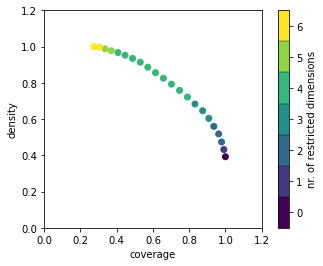

In [11]:
import matplotlib.pyplot as plt
box1.show_tradeoff()
plt.show()

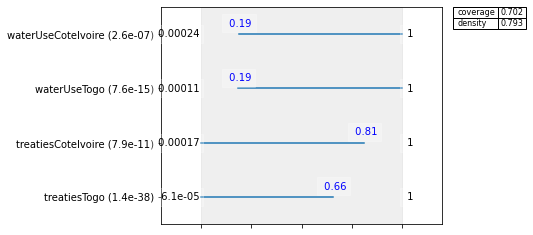

In [12]:
box1.select(10)
box1.inspect(style='graph')
plt.show()

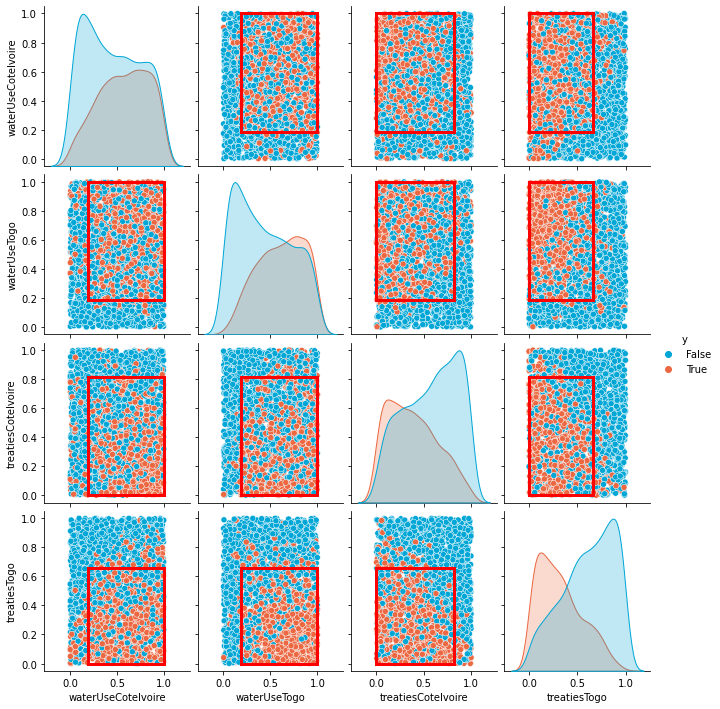

In [13]:
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.savefig(f'figures/vulnerability/PRIM_scatterpairs_akosombo_{RiskTollerantPolicy}.png', dpi=300)
plt.show()

### Risk averse policy

In [14]:
policy = RiskAversePolicy

x = experiments[experiments['model'] == policy].reset_index(drop=True)
y = combined_returnT[combined_returnT['model'] == policy]['j_hyd_a'].reset_index(drop=True)
y = y < y.mean()

prim_alg = prim.Prim(x, y, threshold=0.80, peel_alpha=0.1)
box1 = prim_alg.find_box()

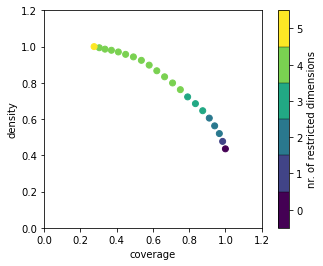

In [15]:
import matplotlib.pyplot as plt
box1.show_tradeoff()
plt.show()

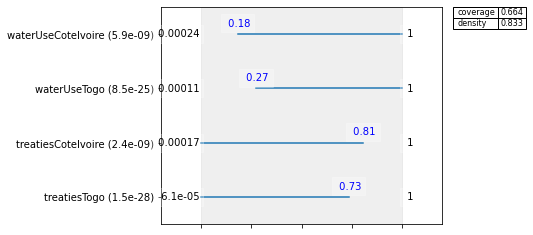

In [16]:
box1.select(10)
box1.inspect(style='graph')
plt.show()

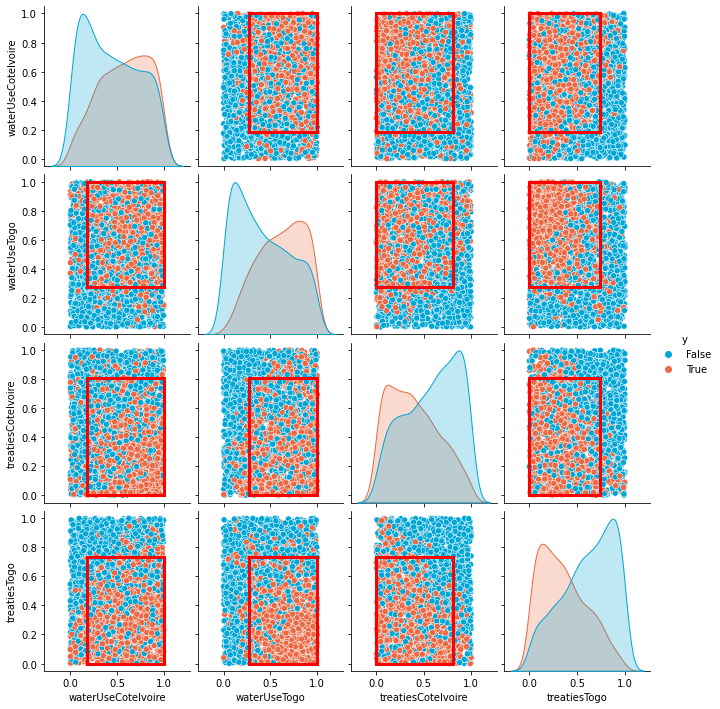

In [17]:
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.savefig(f'figures/vulnerability/PRIM_scatterpairs_akosombo_{RiskAversePolicy}.png', dpi=300)
plt.show()

### Kpong

### Risk tollerant policy

In [18]:
policy = RiskTollerantPolicy

x = experiments[experiments['model'] == policy].reset_index(drop=True)
y = combined_returnT[combined_returnT['model'] == policy]['j_hyd_kp'].reset_index(drop=True)
y = y < y.mean()

prim_alg = prim.Prim(x, y, threshold=0.80, peel_alpha=0.1)
box1 = prim_alg.find_box()

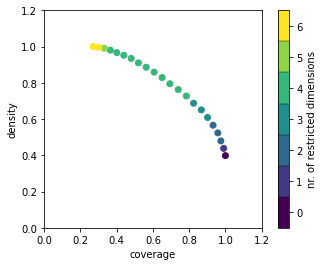

In [19]:
box1.show_tradeoff()
plt.show()

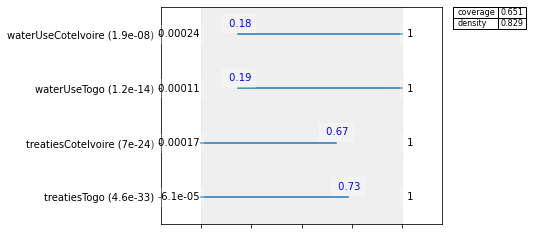

In [20]:
box1.select(11)
box1.inspect(style='graph')
plt.show()

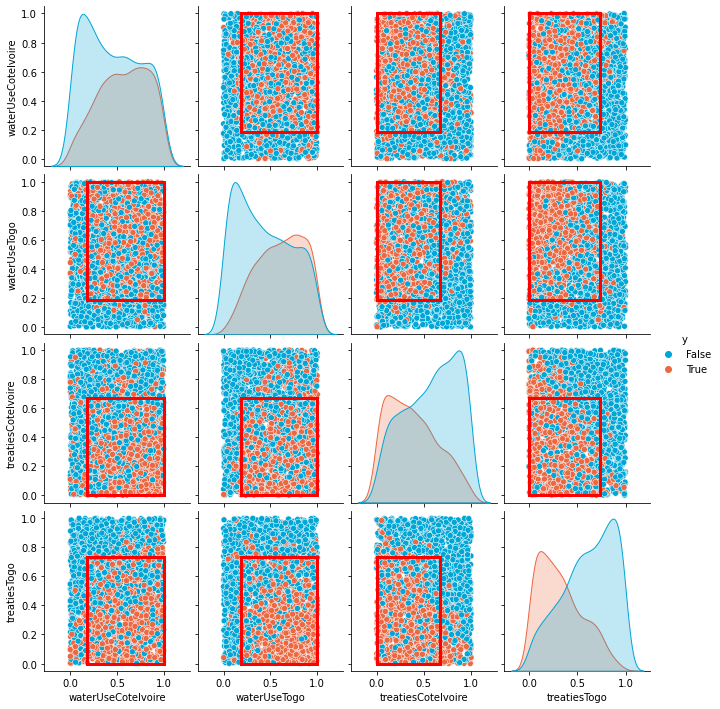

In [21]:
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.savefig(f'figures/vulnerability/PRIM_scatterpairs_kpong_{RiskTollerantPolicy}.png', dpi=300)
plt.show()

### Risk Averse Policy

In [22]:
policy = RiskAversePolicy

x = experiments[experiments['model'] == policy].reset_index(drop=True)
y = combined_returnT[combined_returnT['model'] == policy]['j_hyd_kp'].reset_index(drop=True)
y = y < y.mean()

prim_alg = prim.Prim(x, y, threshold=0.80, peel_alpha=0.1)
box1 = prim_alg.find_box()

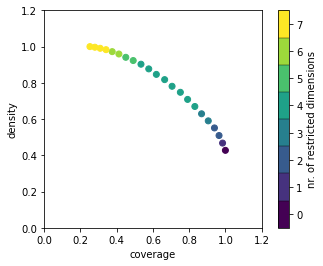

In [23]:
box1.show_tradeoff()
plt.show()

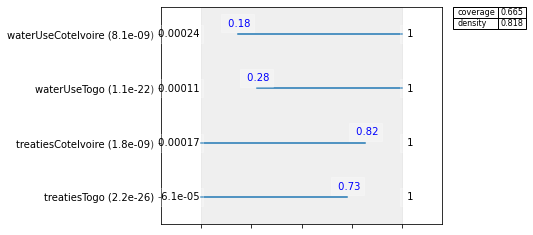

In [24]:
box1.select(10)
box1.inspect(style='graph')
plt.show()

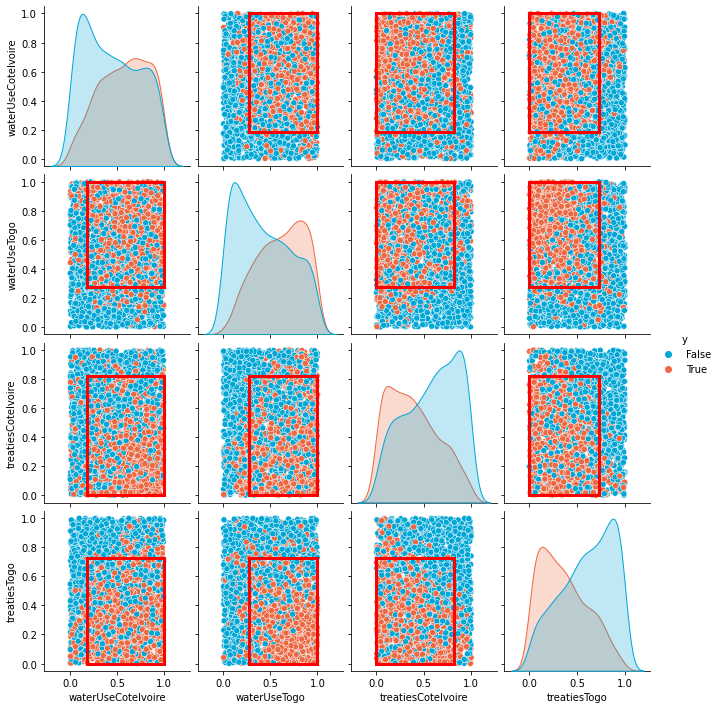

In [25]:
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.savefig(f'figures/vulnerability/PRIM_scatterpairs_kpong_{RiskAversePolicy}.png', dpi=300)
plt.show()

## Reliability

### Risk Tollerant Policy

In [26]:
policy = RiskTollerantPolicy
x = experiments[experiments['model'] == policy].reset_index(drop=True)
y = combined_returnT[combined_returnT['model'] == policy]['j_energy_reliability'].reset_index(drop=True)
y = y > y.mean()

prim_alg = prim.Prim(x, y, threshold=0.80, peel_alpha=0.1)
box1 = prim_alg.find_box()

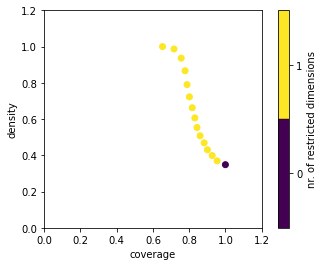

In [27]:
box1.show_tradeoff()
plt.show()

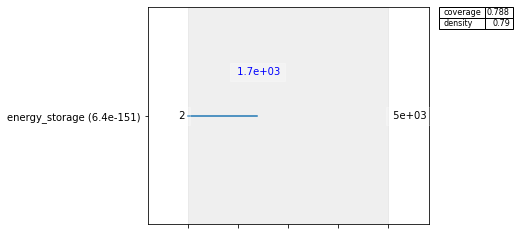

In [28]:
box1.select(10)
box1.inspect(style='graph')
plt.show()

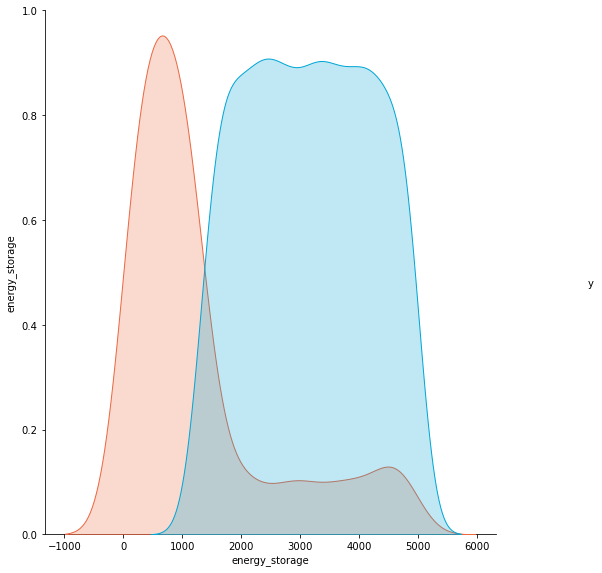

In [29]:
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.savefig(f'figures/vulnerability/PRIM_scatterpairs_energy_reliability_{RiskTollerantPolicy}.png', dpi=300)
plt.show()

### Risk Averse Policy

In [30]:
policy = RiskAversePolicy
x = experiments[experiments['model'] == policy].reset_index(drop=True)
y = combined_returnT[combined_returnT['model'] == policy]['j_energy_reliability'].reset_index(drop=True)
y = y > y.mean()

prim_alg = prim.Prim(x, y, threshold=0.80, peel_alpha=0.1)
box1 = prim_alg.find_box()

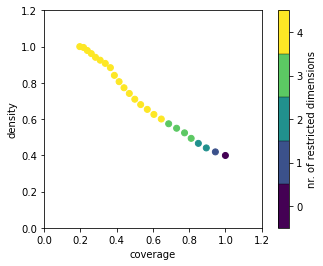

In [31]:
box1.show_tradeoff()
plt.show()

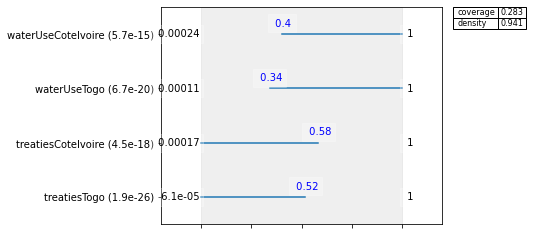

In [32]:
box1.select(20)
box1.inspect(style='graph')
plt.show()

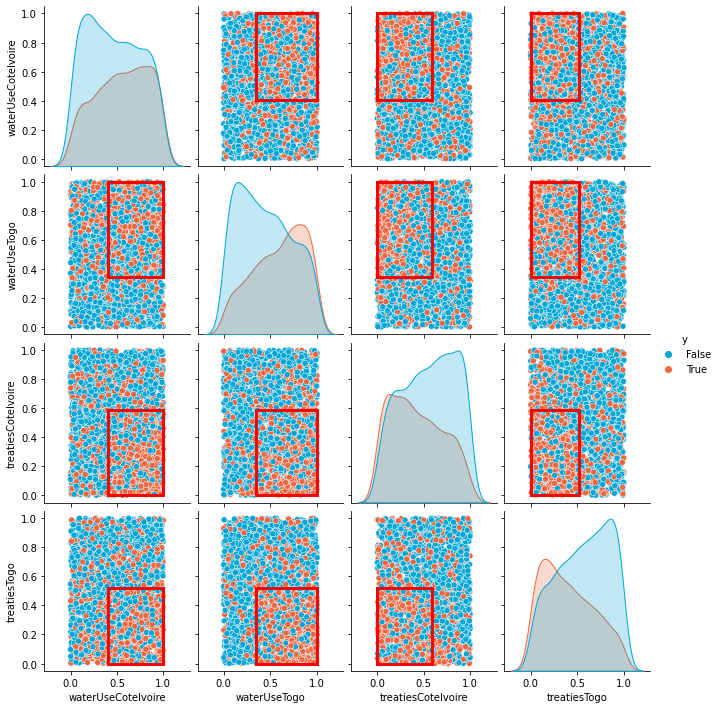

In [33]:
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.savefig(f'figures/vulnerability/PRIM_scatterpairs_energy_reliability_{RiskAversePolicy}.png', dpi=300)
plt.show()

## Irrigation

### Risk Tollerant Policy

In [34]:
policy = RiskTollerantPolicy

x = experiments[experiments['model'] == policy].reset_index(drop=True)
y = combined_returnT[combined_returnT['model'] == policy]['j_irri'].reset_index(drop=True)
y = y < y.mean()

prim_alg = prim.Prim(x, y, threshold=0.80, peel_alpha=0.1)
box1 = prim_alg.find_box()

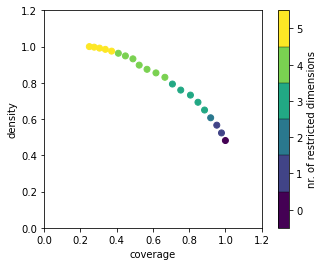

In [35]:
box1.show_tradeoff()
plt.show()

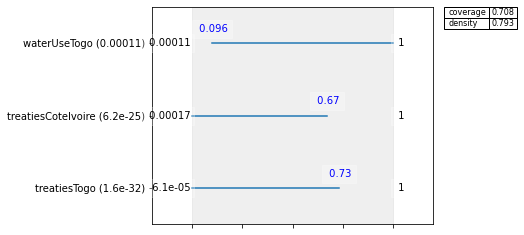

In [36]:
box1.select(8)
box1.inspect(style='graph')
plt.show()

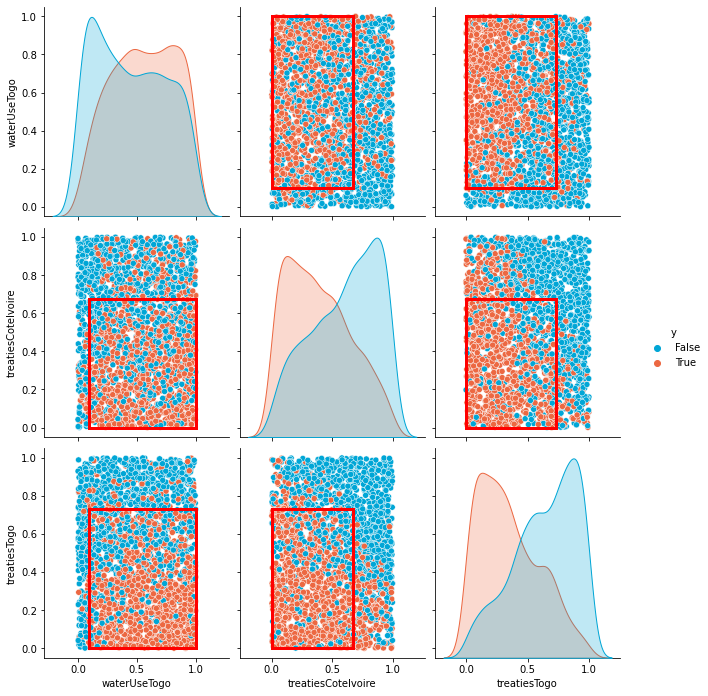

In [37]:
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.savefig(f'figures/vulnerability/PRIM_scatterpairs_irri_{RiskTollerantPolicy}.png', dpi=300)
plt.show()

### Risk Averse Policy

In [38]:
policy = RiskAversePolicy

x = experiments[experiments['model'] == policy].reset_index(drop=True)
y = combined_returnT[combined_returnT['model'] == policy]['j_irri'].reset_index(drop=True)
y = y < y.mean()

prim_alg = prim.Prim(x, y, threshold=0.80, peel_alpha=0.1)
box1 = prim_alg.find_box()

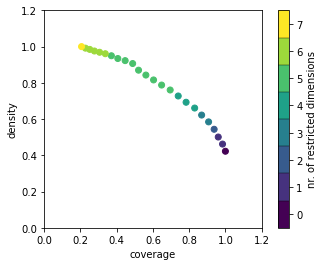

In [39]:
box1.show_tradeoff()
plt.show()

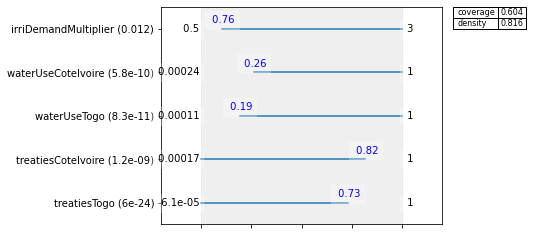

In [40]:
box1.select(11)
box1.inspect(style='graph')
plt.show()

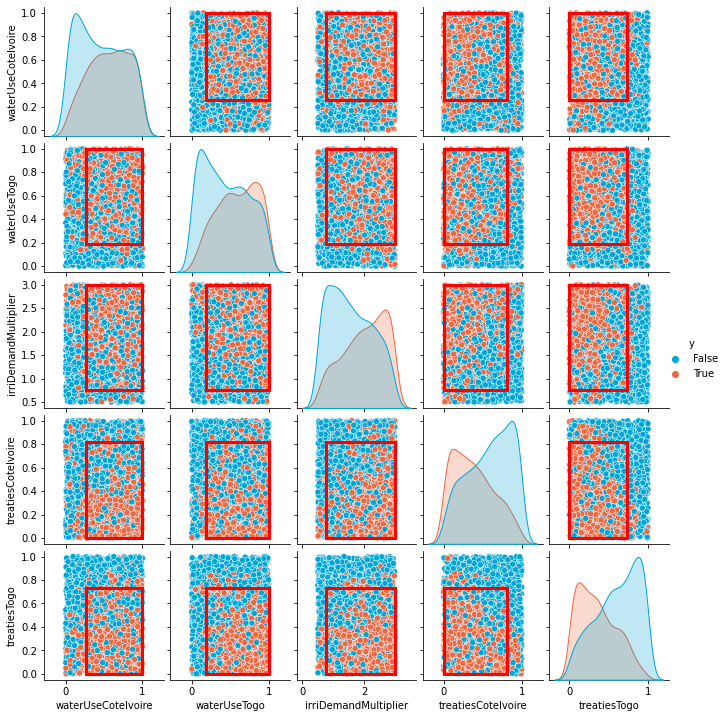

In [41]:
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.savefig(f'figures/vulnerability/PRIM_scatterpairs_irri_{RiskAversePolicy}.png', dpi=300)
plt.show()

## Environment

### Risk Tollerant Policy

In [42]:
policy = RiskTollerantPolicy

x = experiments[experiments['model'] == policy].reset_index(drop=True)
y = combined_returnT[combined_returnT['model'] == policy]['j_env'].reset_index(drop=True)
y = y < y.mean()

prim_alg = prim.Prim(x, y, threshold=0.80, peel_alpha=0.1)
box1 = prim_alg.find_box()

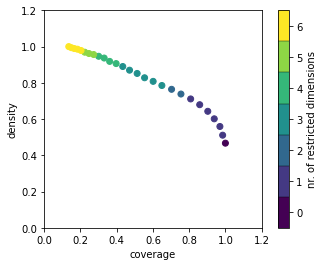

In [43]:
box1.show_tradeoff()
plt.show()

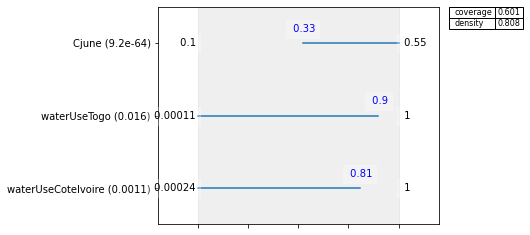

In [44]:
box1.select(10)
box1.inspect(style='graph')
plt.show()

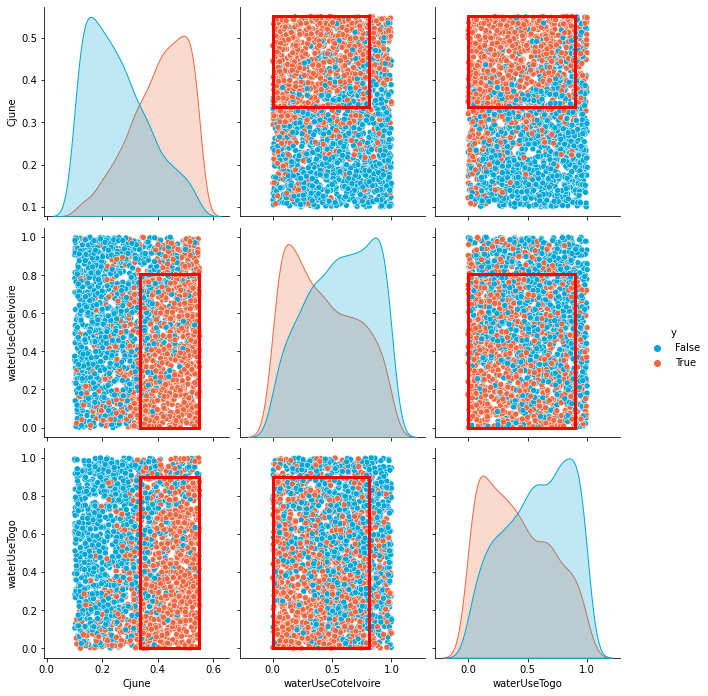

In [45]:
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.savefig(f'figures/vulnerability/PRIM_scatterpairs_env_{RiskTollerantPolicy}.png', dpi=300)
plt.show()

### Risk Averse Policy

In [47]:
# policy = RiskAversePolicy

# x = experiments[experiments['model'] == policy].reset_index(drop=True)
# y = combined_returnT[combined_returnT['model'] == policy]['j_env'].reset_index(drop=True)
# y = y < y.mean()

# prim_alg = prim.Prim(x, y, threshold=0.80, peel_alpha=0.1)
# box1 = prim_alg.find_box()

In [48]:
# box1.show_tradeoff()
# plt.show()

In [49]:
# box1.select(10)
# box1.inspect(style='graph')
# plt.show()

In [50]:
# box1.show_pairs_scatter()
# fig = plt.gcf()
# fig.set_size_inches(5,5)
# plt.title(f'env_{RiskAversePolicy}')

# # plt.savefig(f'figures/vulnerability/PRIM_scatterpairs_env_{RiskAversePolicy}.png', dpi=300)
# plt.show()

## Flooding

### Risk Tollerant Policy

In [51]:
policy = RiskTollerantPolicy

x = experiments[experiments['model'] == policy].reset_index(drop=True)
y = combined_returnT[combined_returnT['model'] == policy]['j_fldcntrl'].reset_index(drop=True)
y = y > y.mean()

prim_alg = prim.Prim(x, y, threshold=0.80, peel_alpha=0.09)
box1 = prim_alg.find_box()

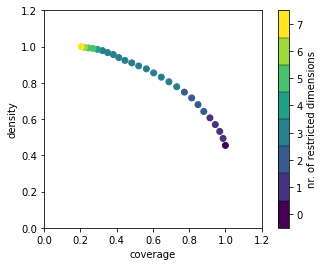

In [52]:
box1.show_tradeoff()
plt.show()

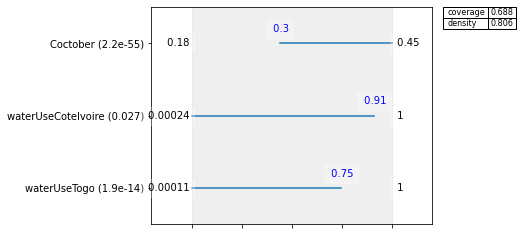

In [53]:
box1.select(10)
box1.inspect(style='graph')
plt.show()

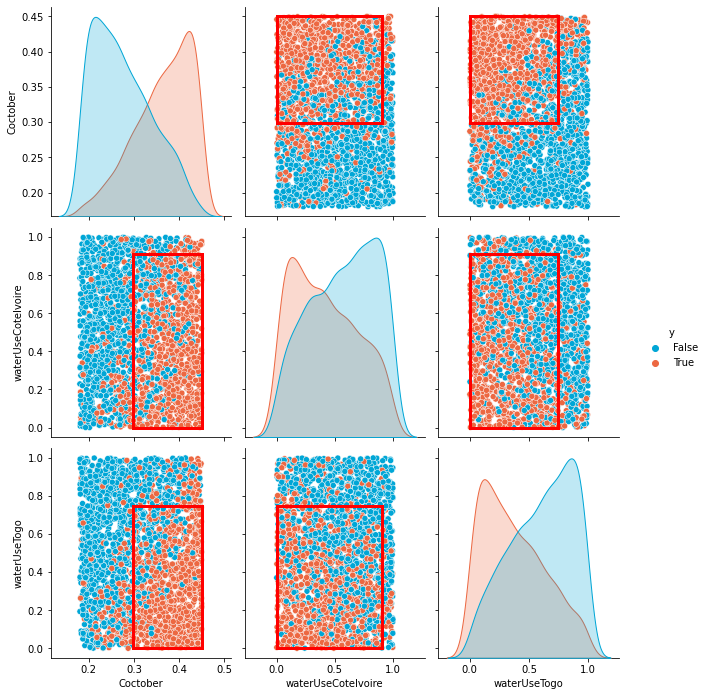

In [54]:
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.savefig(f'figures/vulnerability/PRIM_scatterpairs_flood_{RiskTollerantPolicy}.png', dpi=300)
plt.show()

### Risk Averse Policy

In [55]:
policy = RiskTollerantPolicy

x = experiments[experiments['model'] == policy].reset_index(drop=True)
y = combined_returnT[combined_returnT['model'] == policy]['j_fldcntrl'].reset_index(drop=True)
y = y >y.mean()

prim_alg = prim.Prim(x, y, threshold=0.80, peel_alpha=0.09)
box1 = prim_alg.find_box()

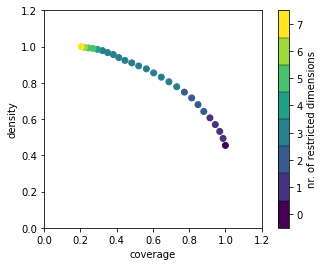

In [56]:
box1.show_tradeoff()
plt.show()

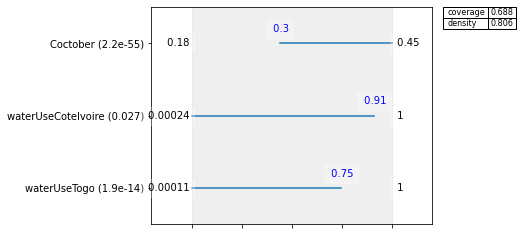

In [57]:
box1.select(10)
box1.inspect(style='graph')
plt.show()

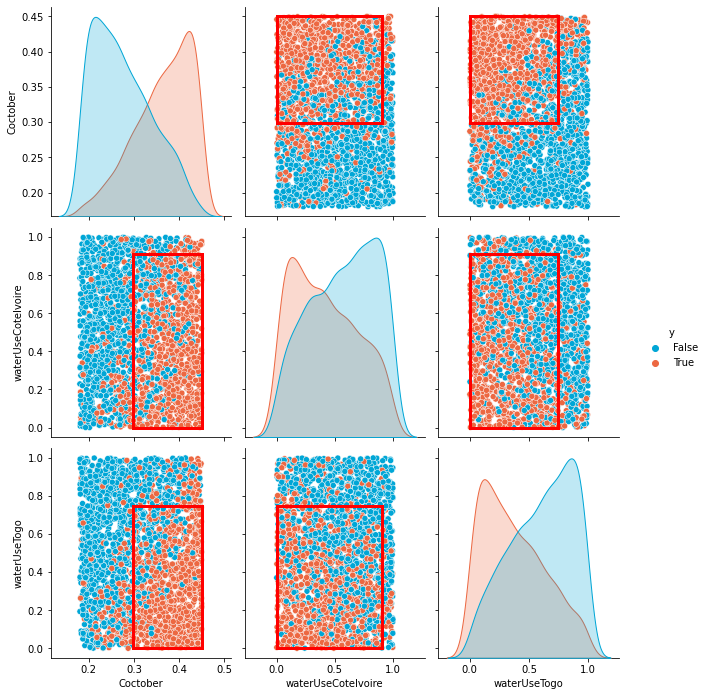

In [58]:
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.savefig(f'figures/vulnerability/PRIM_scatterpairs_flood_{RiskAversePolicy}.png', dpi=300)
plt.show()

## Feature scoring

In [59]:
from ema_workbench.analysis import feature_scoring
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

uncertainties = ['Capril', 'Caugust', 'Cdecember', 'Cfebruary', 'Cjanuary', 'Cjuly',
               'Cjune', 'Cmarch', 'Cmay', 'Cnovember', 'Coctober', 'Cseptember',
               'irriDemandMultiplier', 'waterUseBenin', 'waterUseBurkinaFaso', 'waterUseCoteIvoire',
               'waterUseTogo']

levers = ['treatiesBenin', 'treatiesBurkinaFaso', 'treatiesCoteIvoire', 'treatiesTogo','energy_storage']

### Risk Tollerant Policy

In [60]:
policy = RiskTollerantPolicy

x = experiments[experiments['model'] == policy].reset_index(drop=True)
y = outcomes_dfT[combined_returnT['model'] == policy].reset_index(drop=True)

fs = feature_scoring.get_feature_scores_all(x, y)

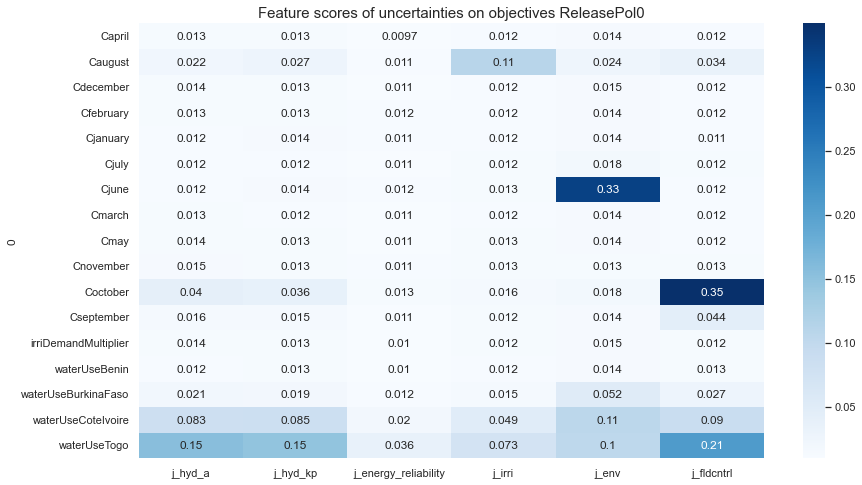

In [61]:
sns.set(rc = {'figure.figsize':(14,8)})
sns.heatmap(fs.loc[uncertainties], cmap="Blues", annot=True)
plt.title(f'Feature scores of uncertainties on objectives {RiskTollerantPolicy[0:11]}',  fontdict = {'fontsize' : 15})
plt.savefig(f'figures/vulnerability/featurescoring_uncertainties_{RiskTollerantPolicy}.png', dpi=300)
plt.show()

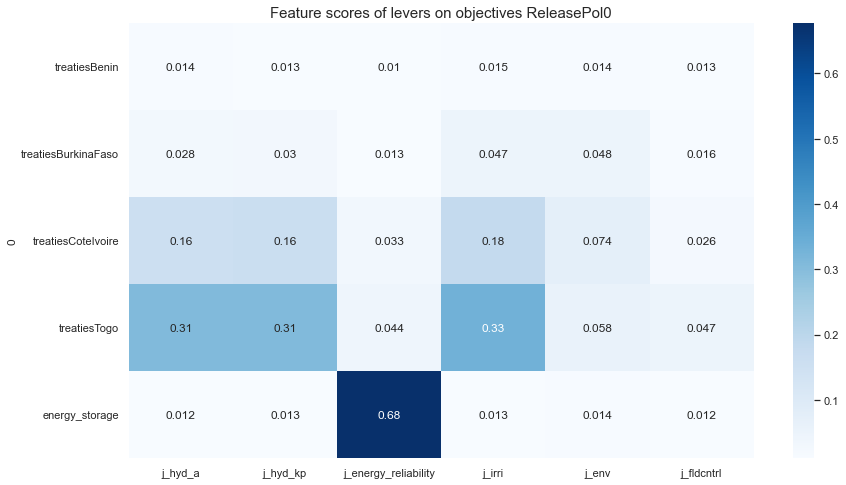

In [62]:
sns.set(rc = {'figure.figsize':(14,8)})
sns.heatmap(fs.loc[levers], cmap="Blues", annot=True)
plt.title(f'Feature scores of levers on objectives {RiskTollerantPolicy[0:11]}',  fontdict = {'fontsize' : 15})
plt.savefig(f'figures/vulnerability/featurescoring_levers_{RiskTollerantPolicy}.png', dpi=300)
plt.show()

### Risk Averse Policy

In [63]:
policy = RiskAversePolicy

x = experiments[experiments['model'] == policy].reset_index(drop=True)
y = outcomes_dfT[combined_returnT['model'] == policy].reset_index(drop=True)

fs = feature_scoring.get_feature_scores_all(x, y)

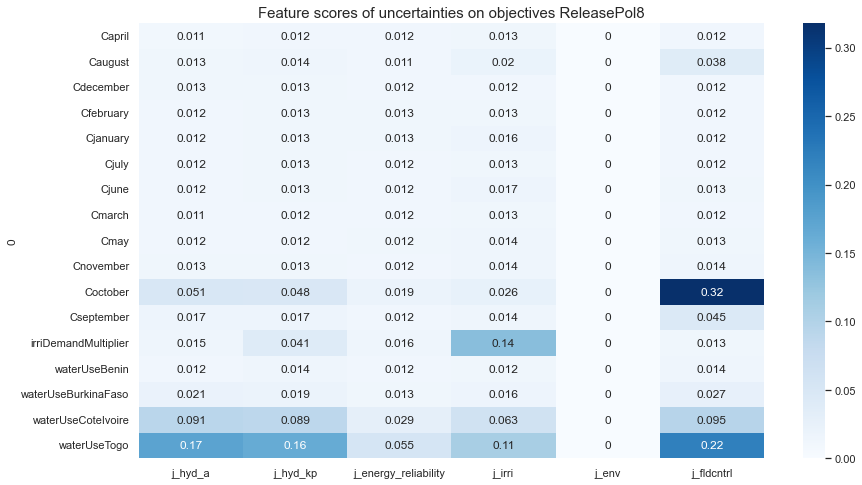

In [64]:
sns.set(rc = {'figure.figsize':(14,8)})
sns.heatmap(fs.loc[uncertainties], cmap="Blues", annot=True)
plt.title(f'Feature scores of uncertainties on objectives {RiskAversePolicy[0:11]}',  fontdict = {'fontsize' : 15})
plt.savefig(f'figures/vulnerability/featurescoring_uncertainties_{RiskAversePolicy}.png', dpi=300)
plt.show()

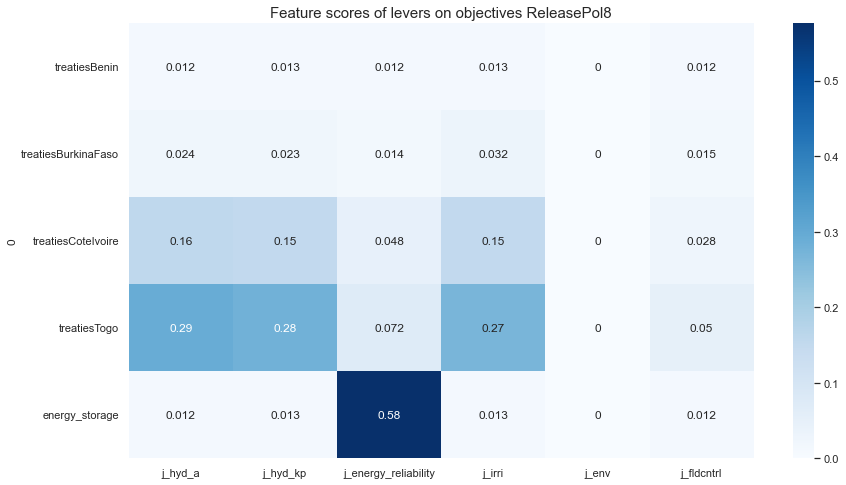

In [65]:
sns.set(rc = {'figure.figsize':(14,8)})
sns.heatmap(fs.loc[levers], cmap="Blues", annot=True)
plt.title(f'Feature scores of levers on objectives {RiskAversePolicy[0:11]}',  fontdict = {'fontsize' : 15})
plt.savefig(f'figures/vulnerability/featurescoring_levers_{RiskAversePolicy}.png', dpi=300)
plt.show()

### Environmental policy

In [66]:
policy = 'ReleasePol2Set50x20'


x = experiments[experiments['model'] == policy].reset_index(drop=True)
y = outcomes_dfT[combined_returnT['model'] == policy].reset_index(drop=True)

fs = feature_scoring.get_feature_scores_all(x, y)


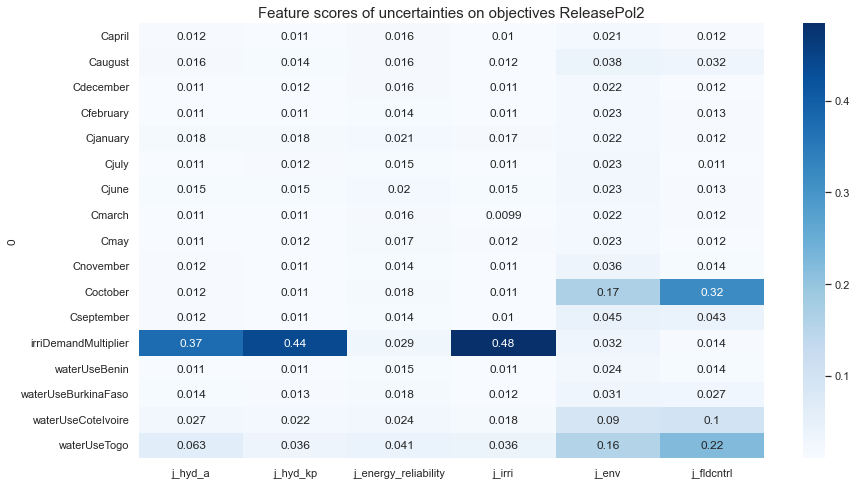

In [67]:
sns.set(rc = {'figure.figsize':(14,8)})
sns.heatmap(fs.loc[uncertainties], cmap="Blues", annot=True)
plt.title(f'Feature scores of uncertainties on objectives {policy[0:11]}',  fontdict = {'fontsize' : 15})
plt.savefig(f'figures/vulnerability/featurescoring_uncertainties_{policy}.png', dpi=300)
plt.show()

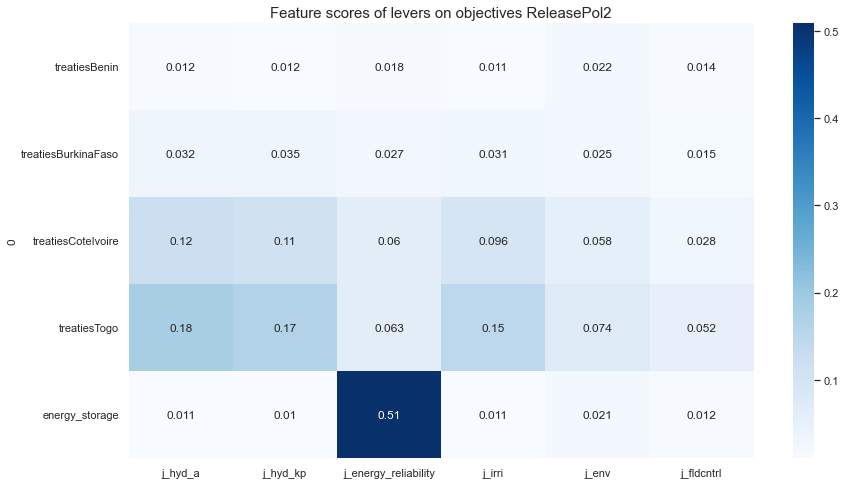

In [68]:
sns.set(rc = {'figure.figsize':(14,8)})
sns.heatmap(fs.loc[levers], cmap="Blues", annot=True)
plt.title(f'Feature scores of levers on objectives {policy[0:11]}',  fontdict = {'fontsize' : 15})
plt.savefig(f'figures/vulnerability/featurescoring_levers_{policy}.png', dpi=300)
plt.show()